SUPPORT VECTOR MACHINE
Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset
Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.
Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.
Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.
Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.
Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [47]:
#Loading dataset
df=pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

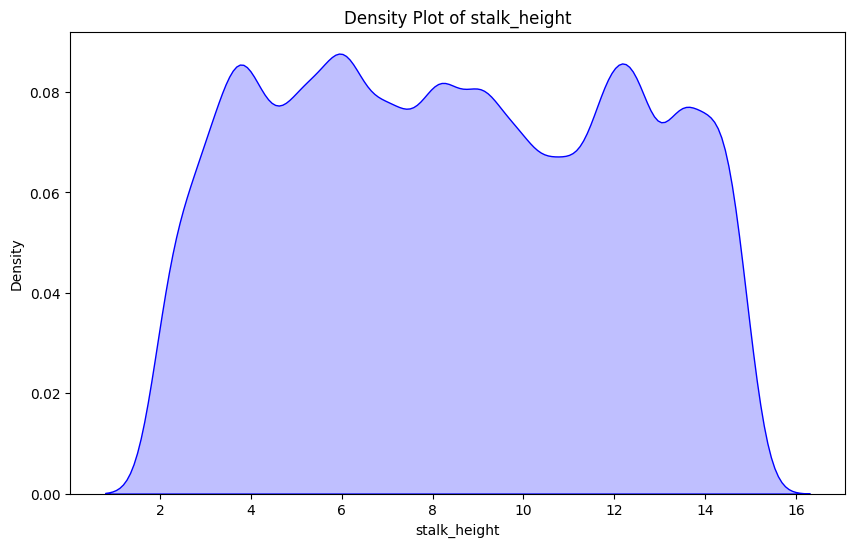

In [49]:
# Create the density plot
df_columns = df.columns

plt.figure(figsize=(10, 6))
sns.kdeplot(df['stalk_height'], shade=True, color="blue", bw_adjust=0.5)
plt.title(f'Density Plot of stalk_height')
plt.xlabel('stalk_height')
plt.ylabel('Density')
plt.show()

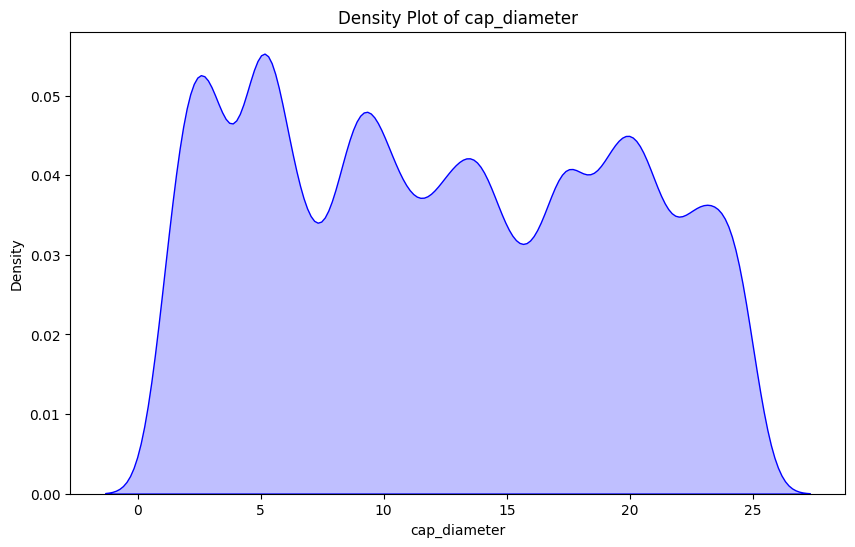

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['cap_diameter'], shade=True, color="blue", bw_adjust=0.5)
plt.title(f'Density Plot of cap_diameter')
plt.xlabel('cap_diameter')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='cap_shape', ylabel='Count'>

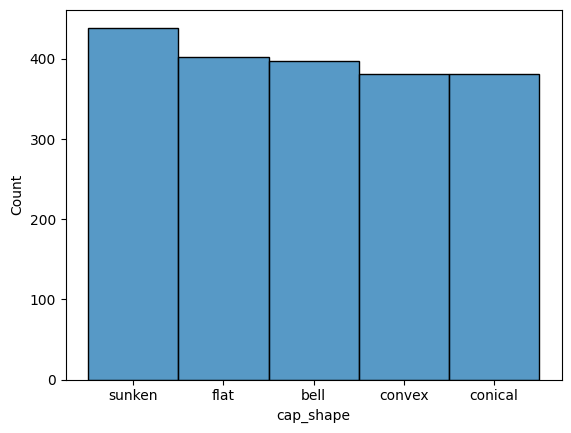

In [51]:
sns.histplot(df['cap_shape'])

<Axes: xlabel='cap_shape', ylabel='Count'>

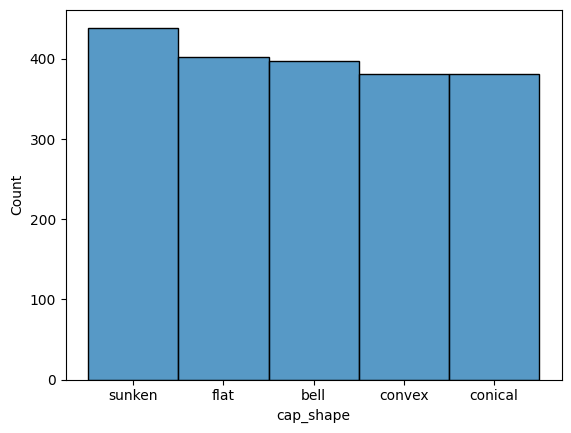

In [52]:
sns.histplot(df['cap_shape'])

In [53]:
for i in df_columns:
    print(i)

Unnamed: 0
cap_shape
cap_surface
cap_color
bruises
odor
gill_attachment
gill_spacing
gill_size
gill_color
stalk_shape
stalk_root
stalk_surface_above_ring
stalk_surface_below_ring
stalk_color_above_ring
stalk_color_below_ring
veil_type
veil_color
ring_number
ring_type
spore_print_color
population
habitat
class
stalk_height
cap_diameter


<Axes: xlabel='cap_surface', ylabel='count'>

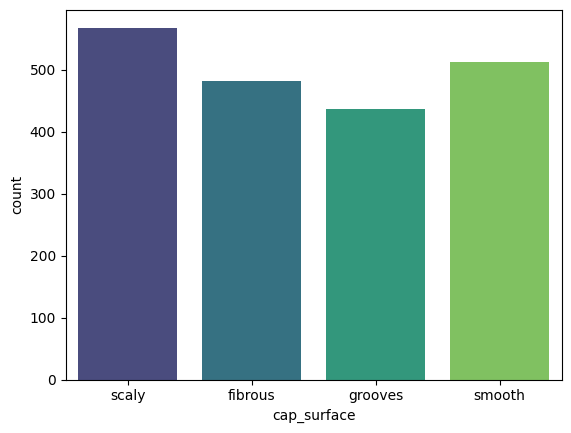

In [54]:
sns.countplot(x=df['cap_surface'], palette="viridis")

<Axes: xlabel='cap_shape', ylabel='count'>

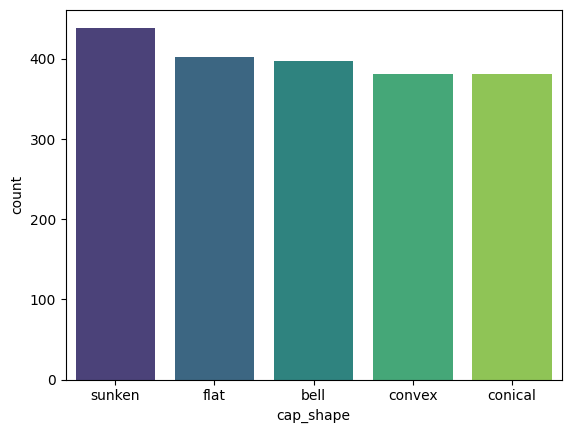

In [55]:
sns.countplot(x=df['cap_shape'], palette="viridis")

<Axes: xlabel='cap_surface', ylabel='count'>

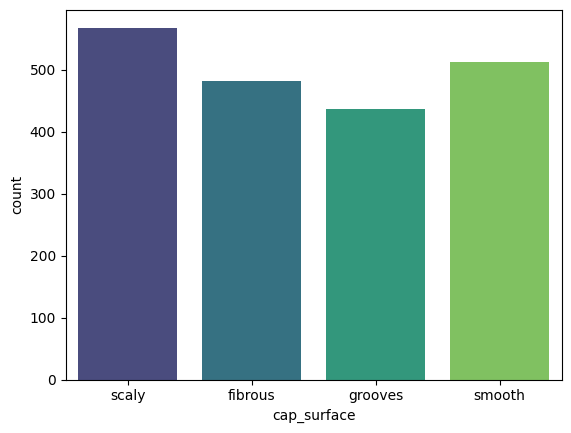

In [56]:
sns.countplot(x=df['cap_surface'], palette="viridis")

<Axes: xlabel='cap_color', ylabel='count'>

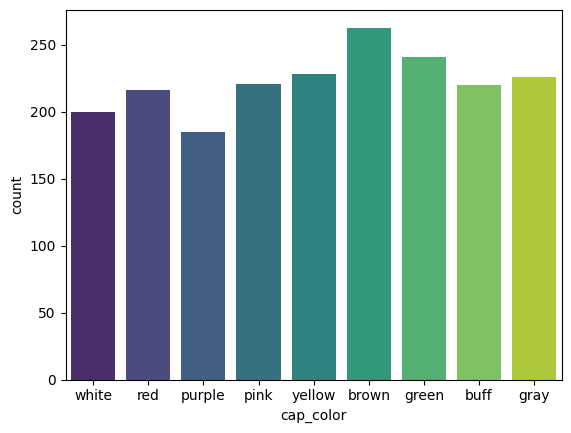

In [57]:
sns.countplot(x=df['cap_color'], palette="viridis")

<Axes: xlabel='bruises', ylabel='count'>

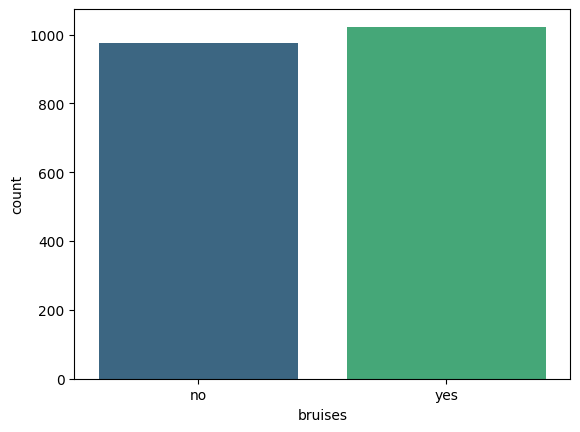

In [58]:
sns.countplot(x=df['bruises'], palette="viridis")

<Axes: xlabel='odor', ylabel='count'>

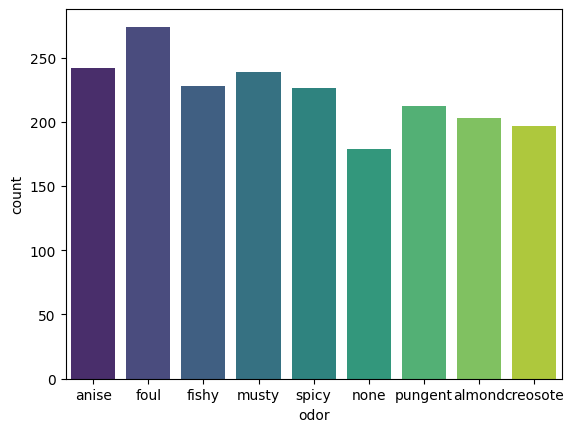

In [59]:

sns.countplot(x=df['odor'], palette="viridis")

<Axes: xlabel='gill_attachment', ylabel='count'>

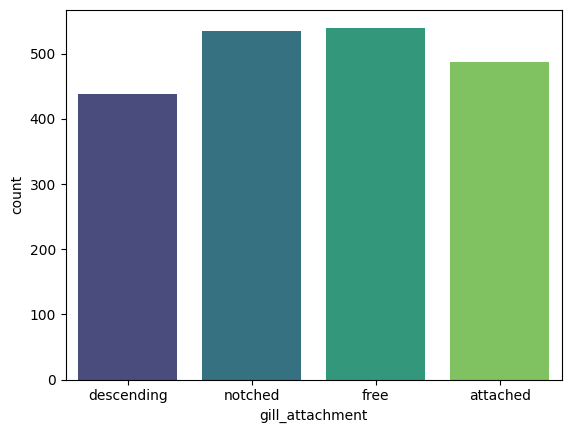

In [60]:
sns.countplot(x=df['gill_attachment'], palette="viridis")

<Axes: xlabel='gill_spacing', ylabel='count'>

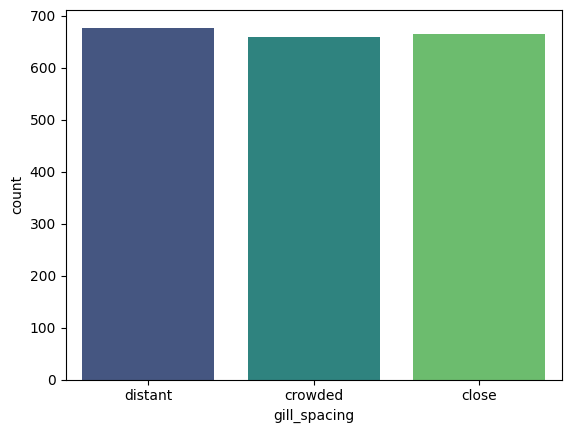

In [61]:

sns.countplot(x=df['gill_spacing'], palette="viridis")

<Axes: xlabel='gill_size', ylabel='count'>

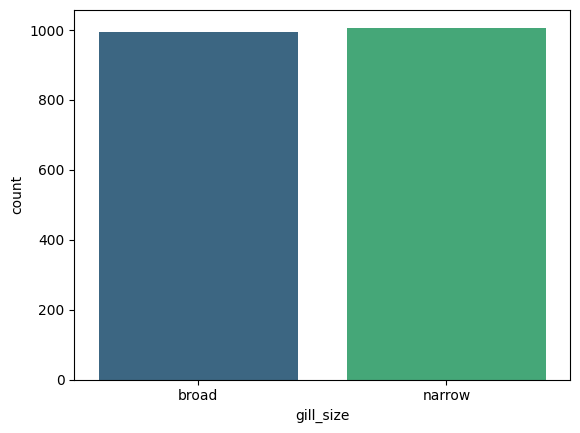

In [62]:
sns.countplot(x=df['gill_size'], palette="viridis")

<Axes: xlabel='gill_color', ylabel='count'>

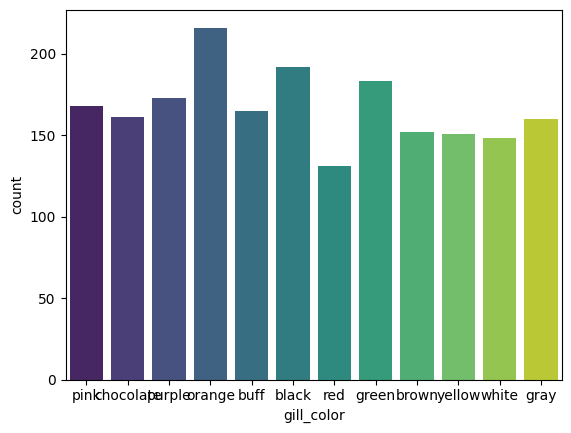

In [63]:
sns.countplot(x=df['gill_color'], palette="viridis")

<Axes: xlabel='stalk_shape', ylabel='count'>

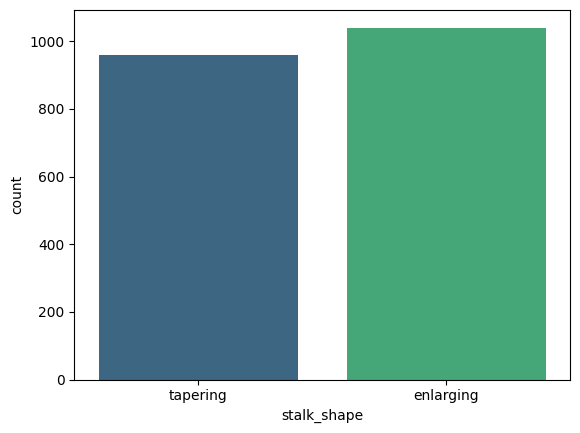

In [64]:
sns.countplot(x=df['stalk_shape'], palette="viridis")

<Axes: xlabel='stalk_root', ylabel='count'>

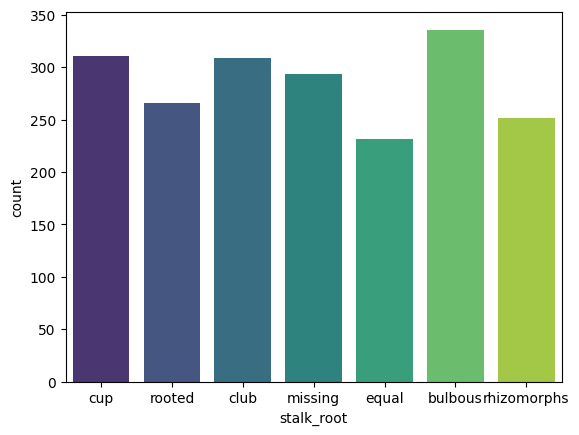

In [65]:
sns.countplot(x=df['stalk_root'], palette="viridis")

<Axes: xlabel='stalk_surface_above_ring', ylabel='count'>

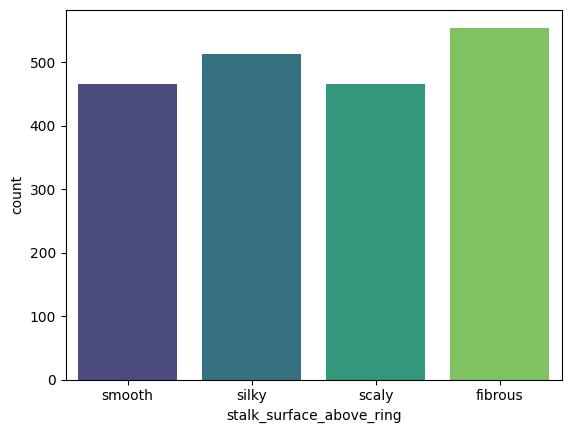

In [66]:
sns.countplot(x=df['stalk_surface_above_ring'], palette="viridis")

<Axes: xlabel='stalk_surface_below_ring', ylabel='count'>

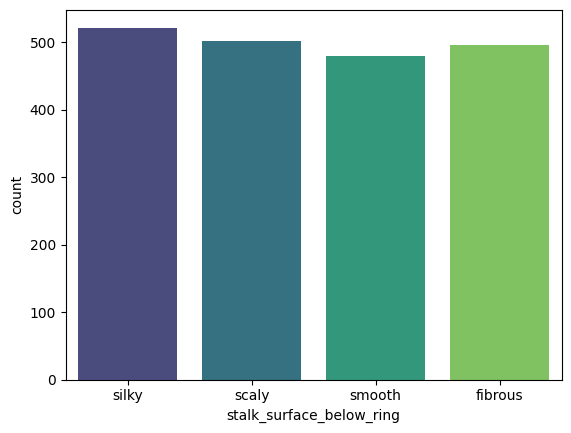

In [67]:
sns.countplot(x=df['stalk_surface_below_ring'], palette="viridis")

<Axes: xlabel='stalk_color_above_ring', ylabel='count'>

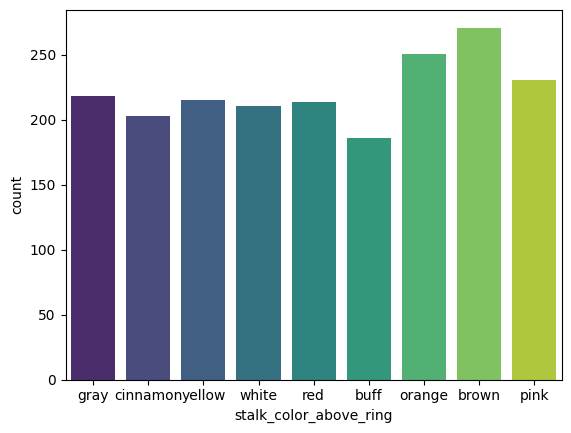

In [68]:
sns.countplot(x=df['stalk_color_above_ring'], palette="viridis")

<Axes: xlabel='stalk_color_below_ring', ylabel='count'>

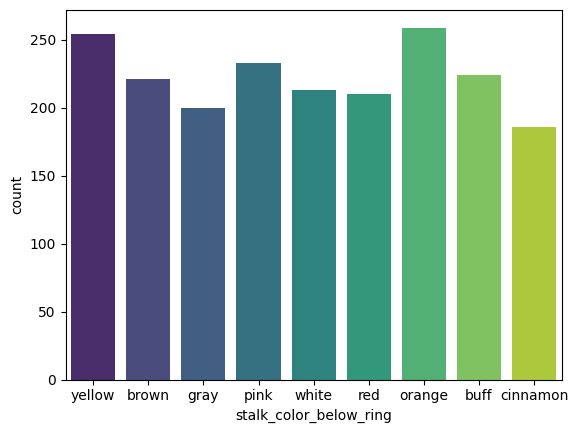

In [69]:

sns.countplot(x=df['stalk_color_below_ring'], palette="viridis")

<Axes: xlabel='veil_type', ylabel='count'>

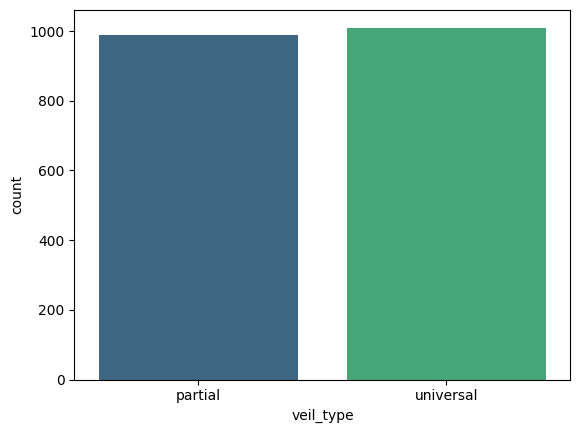

In [70]:
sns.countplot(x=df['veil_type'], palette="viridis")

<Axes: xlabel='veil_color', ylabel='count'>

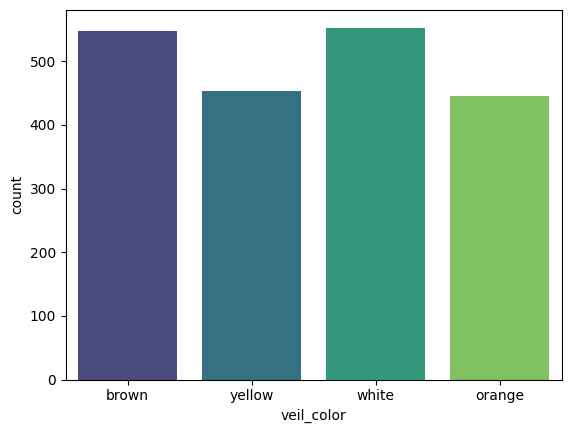

In [71]:
sns.countplot(x=df['veil_color'], palette="viridis")

<Axes: xlabel='ring_number', ylabel='count'>

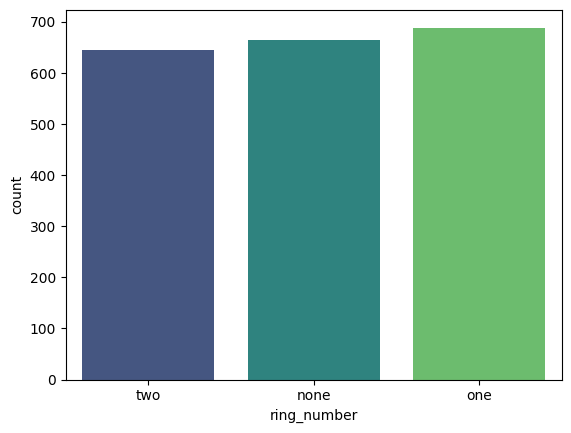

In [72]:
sns.countplot(x=df['ring_number'], palette="viridis")

<Axes: xlabel='ring_type', ylabel='count'>

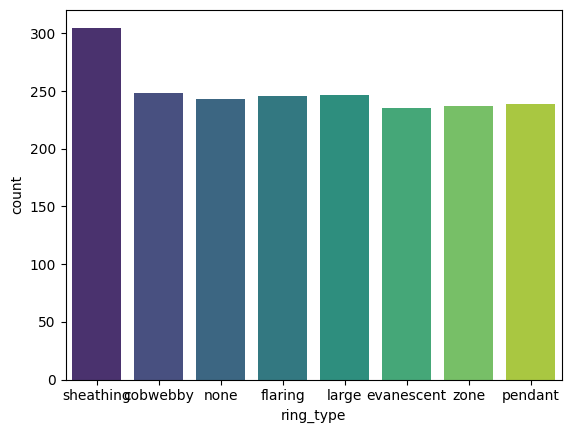

In [73]:

sns.countplot(x=df['ring_type'], palette="viridis")

<Axes: xlabel='spore_print_color', ylabel='count'>

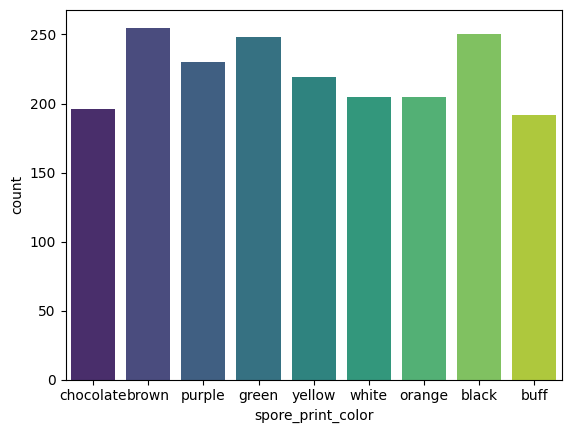

In [74]:

sns.countplot(x=df['spore_print_color'], palette="viridis")

<Axes: xlabel='population', ylabel='count'>

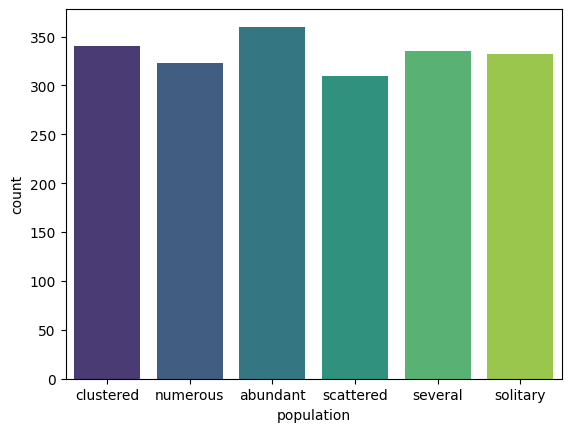

In [75]:
sns.countplot(x=df['population'], palette="viridis")

<Axes: xlabel='habitat', ylabel='count'>

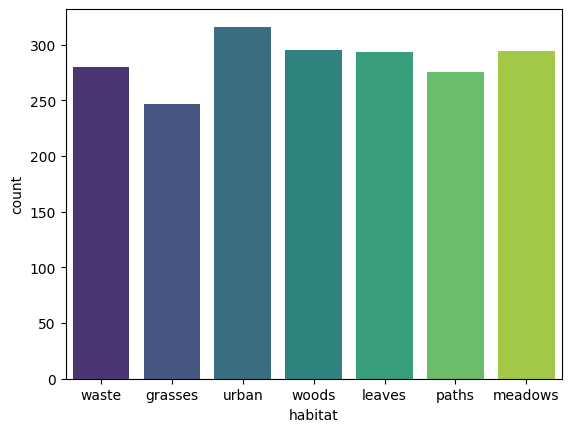

In [76]:

sns.countplot(x=df['habitat'], palette="viridis")

<Axes: xlabel='class', ylabel='count'>

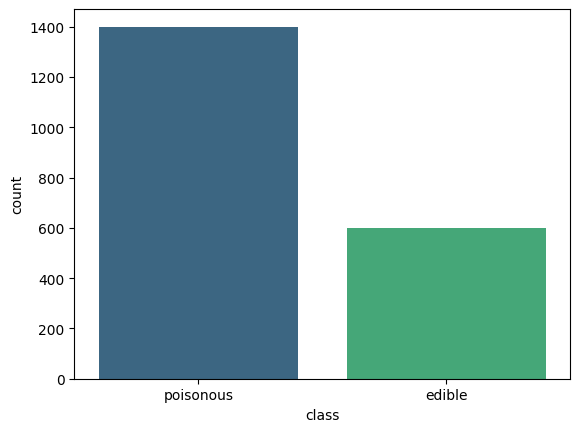

In [77]:
#class distributions to gauge dataset balance or imbalance.
sns.countplot(x=df['class'], palette="viridis")


<Axes: ylabel='cap_diameter'>

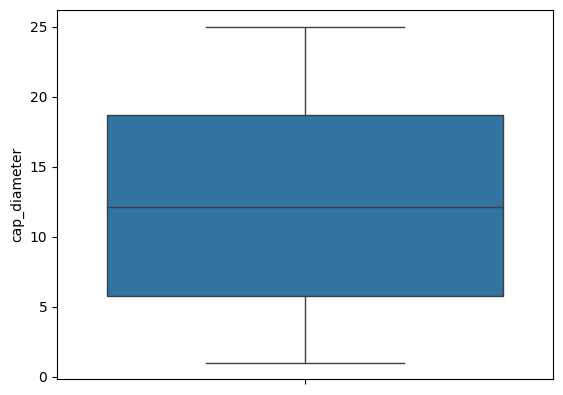

In [78]:
sns.boxplot(df['cap_diameter'])

<Axes: ylabel='stalk_height'>

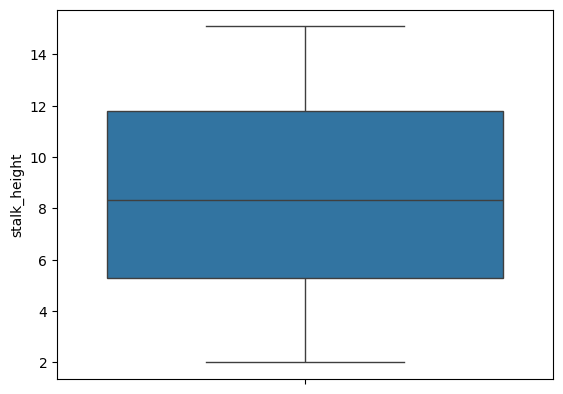

In [79]:
sns.boxplot(df['stalk_height'])

              stalk_height  cap_diameter
stalk_height      1.000000     -0.003486
cap_diameter     -0.003486      1.000000


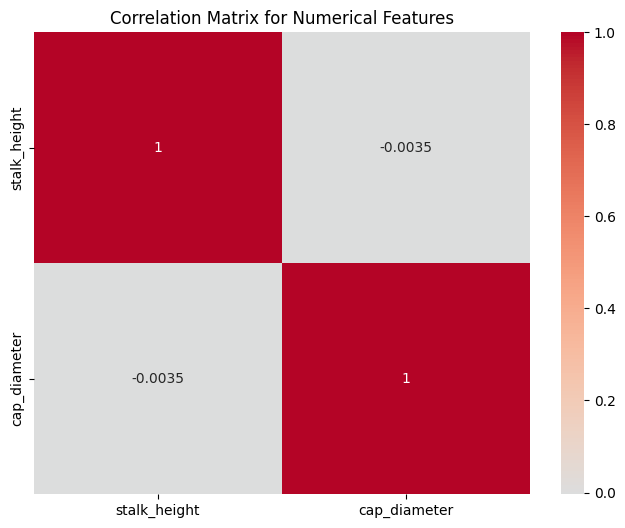

In [80]:



# Select only numerical features for correlation analysis
numerical_features = ['stalk_height', 'cap_diameter']
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [81]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [92]:
#encoding the datasets
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to preserve original data
df_encoded = df.copy()

# Encode categorical features
categorical_columns = [ 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat','class' ]

label_encoder = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])




In [93]:
df['class']

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [94]:
# Compute the correlation matrix for all features
correlation_matrix_full = df_encoded.corr()

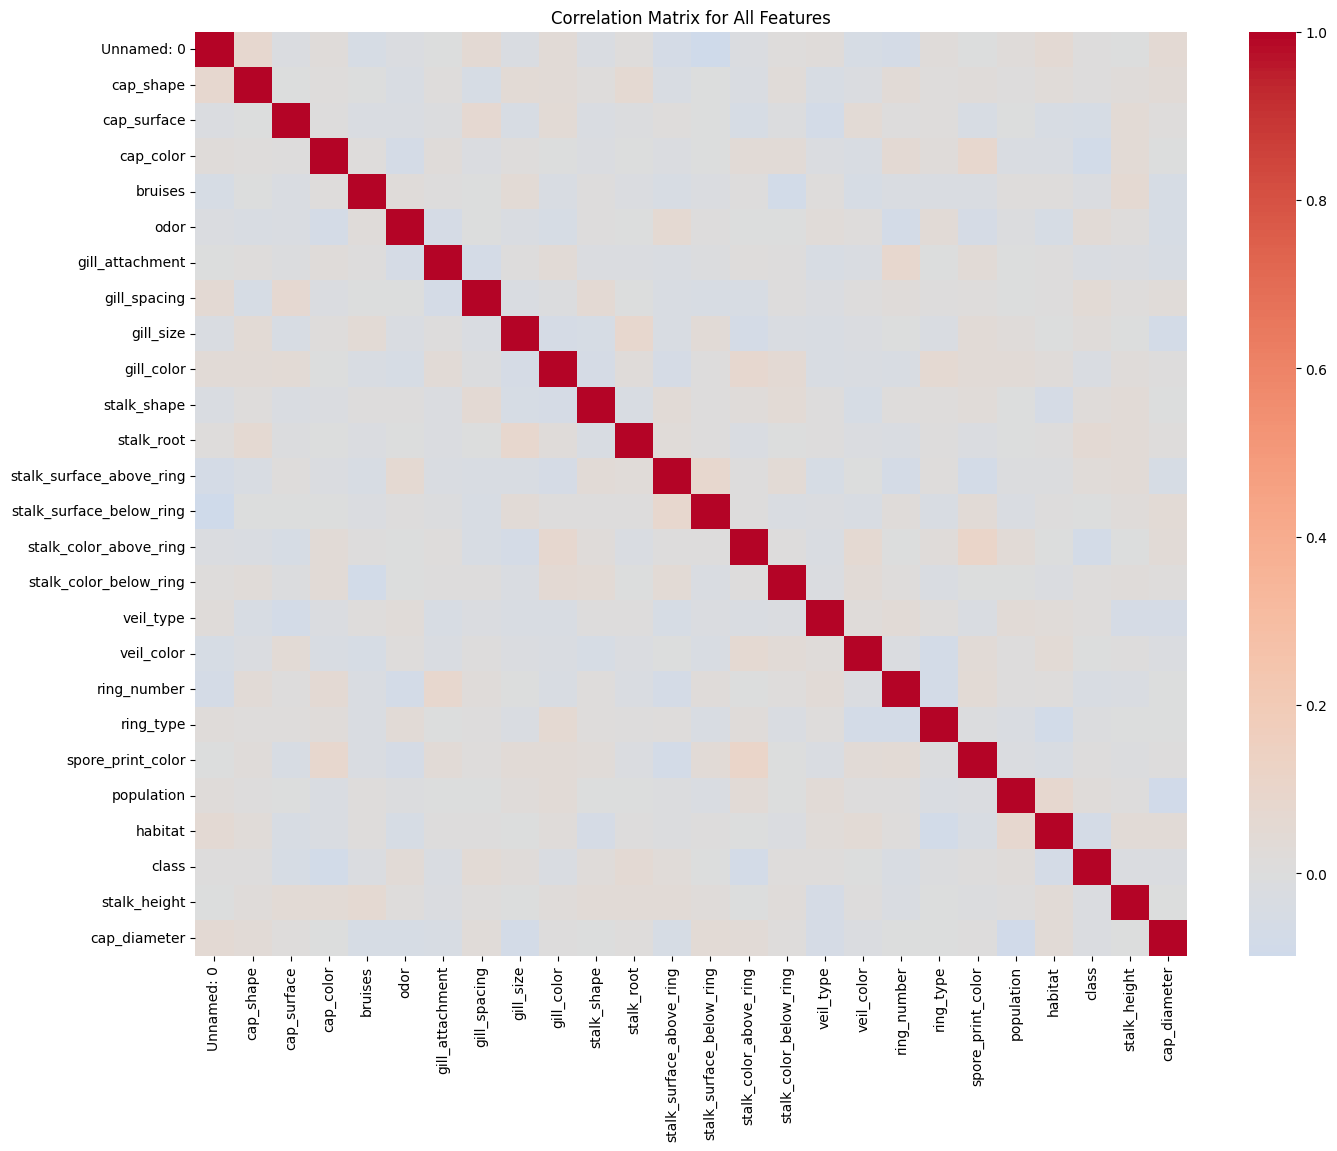

In [95]:
# Compute the correlation matrix for all features
correlation_matrix_full = df_encoded.corr()

# Visualize the correlation matrix for all features using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_full, annot=False, cmap="coolwarm", center=0)
plt.title('Correlation Matrix for All Features')
plt.show()

In [96]:
df_encoded.corr()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.076872,-0.018136,0.024111,-0.046627,-0.012730,-0.005051,0.048191,-0.022992,0.038452,...,0.019658,-0.048383,-0.067070,0.022166,-0.003308,0.018726,0.051532,0.005902,-0.001508,0.051881
cap_shape,0.076872,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.024540,0.037743
cap_surface,-0.018136,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043482,0.016606
cap_color,0.024111,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.044086,-0.000489
bruises,-0.046627,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.064644,-0.046946
odor,-0.012730,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.011217,-0.051549
gill_attachment,-0.005051,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.017367,-0.039526
gill_spacing,0.048191,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.016429,0.029169
gill_size,-0.022992,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.003273,-0.068743
gill_color,0.038452,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026179,0.003895


In [97]:
#Task 2: Data Preprocessing
#1.	Encode categorical variables if necessary.
#2.	Split the dataset into training and testing sets.
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [98]:
standard_data=df[['stalk_height','cap_diameter']]
standard_data

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [99]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to scale
features_to_scale = ['stalk_height', 'cap_diameter']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_encoded[features_to_scale] = scaler.fit_transform(df[features_to_scale])




In [100]:
df_encoded[features_to_scale].head()

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765


In [101]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [102]:
#2.	Split the dataset into training and testing sets.
x=df_encoded.drop(columns=['Unnamed: 0','class'])
y=df_encoded['class']


<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

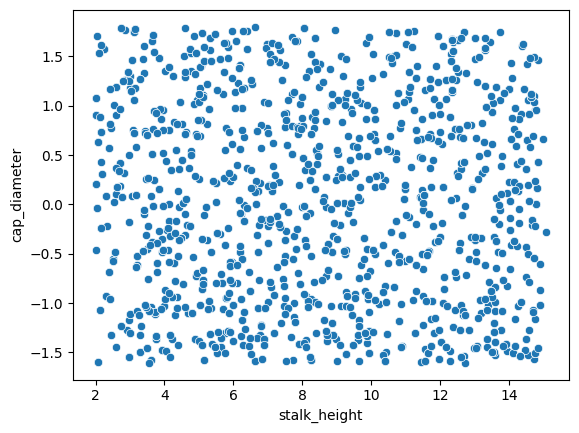

In [103]:
#Task 3: Data Visualization
#1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


sns.scatterplot(x=df['stalk_height'],y=df_encoded['cap_diameter'], palette="viridis")


<Axes: xlabel='class', ylabel='Count'>

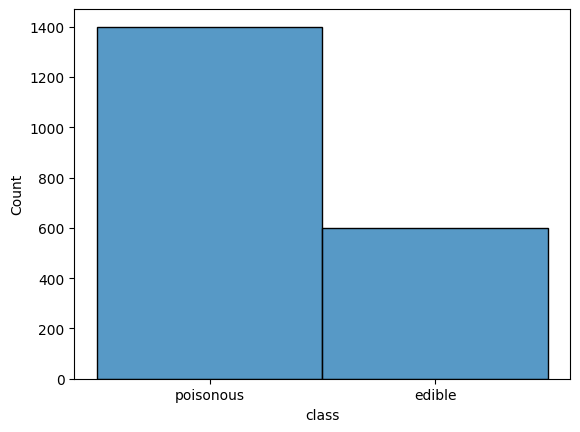

In [104]:

#2.	Visualize class distributions to gauge dataset balance or imbalance

sns.histplot(x=df['class'], palette="viridis")

In [105]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   int64  
 2   cap_surface               2000 non-null   int64  
 3   cap_color                 2000 non-null   int64  
 4   bruises                   2000 non-null   int64  
 5   odor                      2000 non-null   int64  
 6   gill_attachment           2000 non-null   int64  
 7   gill_spacing              2000 non-null   int64  
 8   gill_size                 2000 non-null   int64  
 9   gill_color                2000 non-null   int64  
 10  stalk_shape               2000 non-null   int64  
 11  stalk_root                2000 non-null   int64  
 12  stalk_surface_above_ring  2000 non-null   int64  
 13  stalk_surface_below_ring  2000 non-null   int64  
 14  stalk_co

In [111]:
#Task 4: SVM Implementation
#1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
#2.	Train the SVM model on the training data.
#3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose 'linear', 'rbf', etc. for different kernels

# Train the model on the training data
svm_classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [114]:
# Make predictions on the testing data
y_pred = svm_classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print out the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optional: Display a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1 Score: 0.5344002998500749

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [115]:
#Task 6: Parameter Tuning and Optimization
#1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
#linear, polynomial, radial basis function
# Initialize the SVM classifier
#by putting parameter kernel= 'poly'
svm_classifier = SVC(kernel='poly')  # You can choose 'linear', 'rbf', etc. for different kernels

# Train the model on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print out the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.74
Precision: 0.7645065468047685
Recall: 0.74
F1 Score: 0.6922727272727274


In [119]:
report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 1.0,
  'recall': 0.05263157894736842,
  'f1-score': 0.1,
  'support': 133.0},
 '1': {'precision': 0.6793893129770993,
  'recall': 1.0,
  'f1-score': 0.8090909090909091,
  'support': 267.0},
 'accuracy': 0.685,
 'macro avg': {'precision': 0.8396946564885497,
  'recall': 0.5263157894736842,
  'f1-score': 0.45454545454545453,
  'support': 400.0},
 'weighted avg': {'precision': 0.7859923664122138,
  'recall': 0.685,
  'f1-score': 0.5733181818181818,
  'support': 400.0}}

<Axes: >

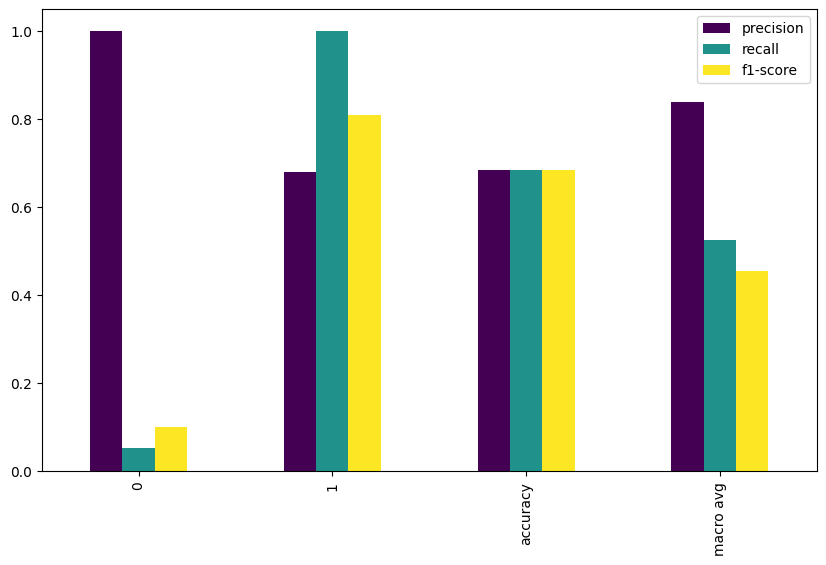

In [122]:

df_report = pd.DataFrame(report).transpose()

# Bar plot for precision, recall, and F1-score
df_report.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 6), colormap='viridis')

In [123]:
#Task 6: Parameter Tuning and Optimization
#1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
#linear, polynomial, radial basis function
# Initialize the SVM classifier #using parameter (kernel='rbf')
svm_classifier = SVC(kernel='rbf')  # You can choose 'linear', 'rbf', etc. for different kernels

# Train the model on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print out the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.685
Precision: 0.7859923664122138
Recall: 0.685
F1 Score: 0.5733181818181818


# regularization parameter

In [128]:
#using parameter   c=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]  with kernel=rbf
c=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# Initialize an empty dictionary to store the scores
scores_dict_rbf = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
for i in  c:
    #Task 6: Parameter Tuning and Optimization
    #1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
    #linear, polynomial, radial basis function
    # Initialize the SVM classifier
    svm_classifier = SVC(C=i, kernel='rbf')  # Example with the 'rbf' kernel
      # You can choose 'linear', 'rbf', etc. for different kernels

    # Train the model on the training data
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print out the evaluation metrics
    #print("Accuracy:", accuracy)
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1 Score:", f1)
    # Append the scores to the respective lists
    scores_dict_rbf['accuracy'].append(accuracy)
    scores_dict_rbf['precision'].append(precision)
    scores_dict_rbf['recall'].append(recall)
    scores_dict_rbf['f1_score'].append(f1)





In [134]:
# Display the dictionar
import numpy as np
print("mean",np.mean(scores_dict_rbf['accuracy'])
,"precision",np.mean(scores_dict_rbf['precision'])
,"recall",np.mean(scores_dict_rbf['recall']),
"f1_score",np.mean(scores_dict_rbf['f1_score'])




      )

mean 0.8070588235294117 precision 0.8157717843977859 recall 0.8070588235294117 f1_score 0.7883184764401782


In [135]:
#using parameter   c=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]  with kernel=poly
c=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# Initialize an empty dictionary to store the scores
scores_dict_poly = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
for i in  c:
    #Task 6: Parameter Tuning and Optimization
    #1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
    #linear, polynomial, radial basis function
    # Initialize the SVM classifier   # Example with the 'rbf' kernel
    svm_classifier = SVC(C=i, kernel='poly')
      # You can choose 'linear', 'rbf', etc. for different kernels

    # Train the model on the training data
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print out the evaluation metrics
    #print("Accuracy:", accuracy)
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1 Score:", f1)
    # Append the scores to the respective lists
    scores_dict_poly['accuracy'].append(accuracy)
    scores_dict_poly['precision'].append(precision)
    scores_dict_poly['recall'].append(recall)
    scores_dict_poly['f1_score'].append(f1)



# Display the dictionary
print(scores_dict_poly)


{'accuracy': [0.74, 0.7675, 0.79, 0.795, 0.79, 0.7975, 0.8075, 0.8175, 0.8275, 0.83, 0.8325, 0.835, 0.84, 0.84, 0.84, 0.8425, 0.84], 'precision': [0.7645065468047685, 0.7680013679323495, 0.7897310924369748, 0.7947212735485293, 0.786, 0.7937689214758751, 0.8044749999999999, 0.8146550155925156, 0.8248284500253678, 0.827374444339355, 0.8299224137931034, 0.8323142980481638, 0.8374485820422215, 0.8374485820422215, 0.8374485820422215, 0.8400590515686982, 0.8378515453024566], 'recall': [0.74, 0.7675, 0.79, 0.795, 0.79, 0.7975, 0.8075, 0.8175, 0.8275, 0.83, 0.8325, 0.835, 0.84, 0.84, 0.84, 0.8425, 0.84], 'f1_score': [0.6922727272727274, 0.7459321308991373, 0.7755405277593872, 0.7816974921630094, 0.7794755244755245, 0.7883871225435374, 0.7994698776029248, 0.8110346546154942, 0.8224102390902546, 0.8252261619123789, 0.8280313037953174, 0.8312710222770098, 0.8372072727272727, 0.8372072727272727, 0.8372072727272727, 0.8399454640454576, 0.8383455882352941]}


In [137]:
# Display the dictionar
import numpy as np
print("mean",np.mean(scores_dict_poly['accuracy'])
,"precision",np.mean(scores_dict_poly['precision'])
,"recall",np.mean(scores_dict_poly['recall']),
"f1_score",np.mean(scores_dict_poly['f1_score']))

mean 0.8136764705882352 precision 0.8129738333526366 recall 0.8136764705882352 f1_score 0.8041565679334867


In [138]:
#using parameter   c=[1,2]  with kernel=linear  taking alot of time so using only two parameters

c=[1,2]
# Initialize an empty dictionary to store the scores
scores_dict_linear = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
for i in  c:
    #Task 6: Parameter Tuning and Optimization
    #1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.
    #linear, polynomial, radial basis function
    # Initialize the SVM classifier
    svm_classifier = SVC(C=i, kernel='linear')  # Example with the 'rbf' kernel
      # You can choose 'linear', 'rbf', etc. for different kernels

    # Train the model on the training data
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(x_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' if needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print out the evaluation metrics
    #print("Accuracy:", accuracy)
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1 Score:", f1)
    # Append the scores to the respective lists
    scores_dict_linear['accuracy'].append(accuracy)
    scores_dict_linear['precision'].append(precision)
    scores_dict_linear['recall'].append(recall)
    scores_dict_linear['f1_score'].append(f1)



# Display the dictionary
print(scores_dict_linear)

{'accuracy': [0.6675, 0.6675], 'precision': [0.44555625, 0.44555625], 'recall': [0.6675, 0.6675], 'f1_score': [0.5344002998500749, 0.5344002998500749]}


In [139]:
# Display the dictionar
import numpy as np
print("mean",np.mean(scores_dict_linear['accuracy'])
,"precision",np.mean(scores_dict_linear['precision'])
,"recall",np.mean(scores_dict_linear['recall']),
"f1_score",np.mean(scores_dict_linear['f1_score']))

mean 0.6675 precision 0.44555625 recall 0.6675 f1_score 0.5344002998500749


# Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.

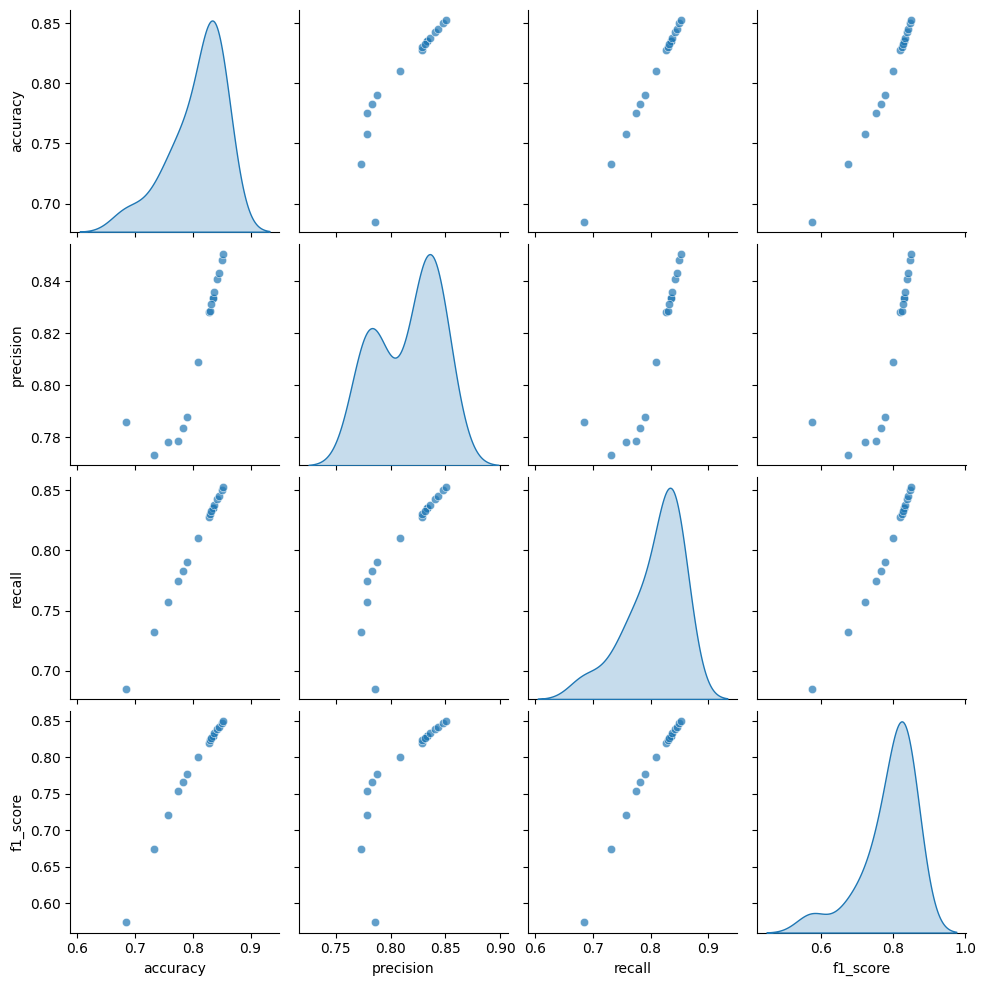

In [140]:
scores_df = pd.DataFrame(scores_dict_rbf)
sns.pairplot(scores_df, vars=['accuracy', 'precision', 'recall', 'f1_score'], diag_kind='kde', kind='scatter', markers='o', plot_kws={'alpha': 0.7})

# Compare SVM performance with various kernels (e.g., rbf  basis function).
Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

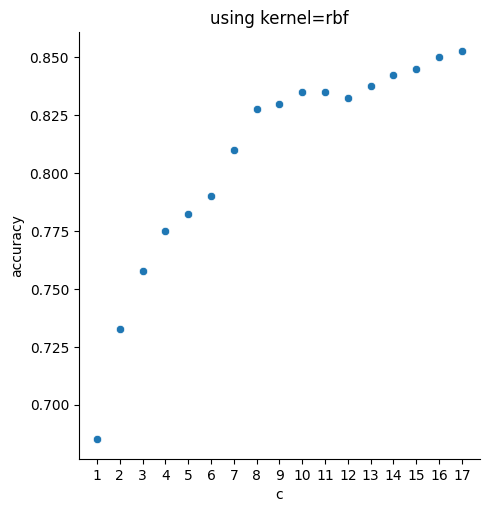

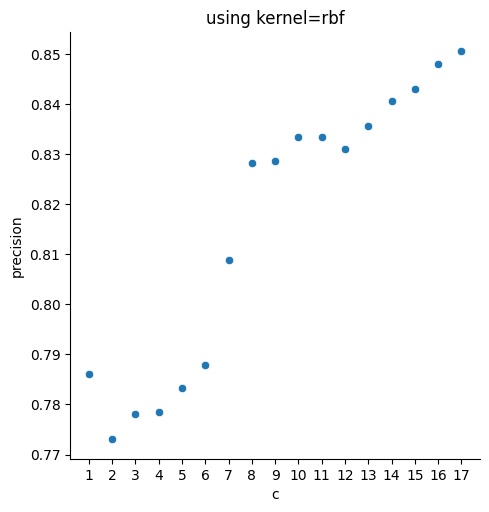

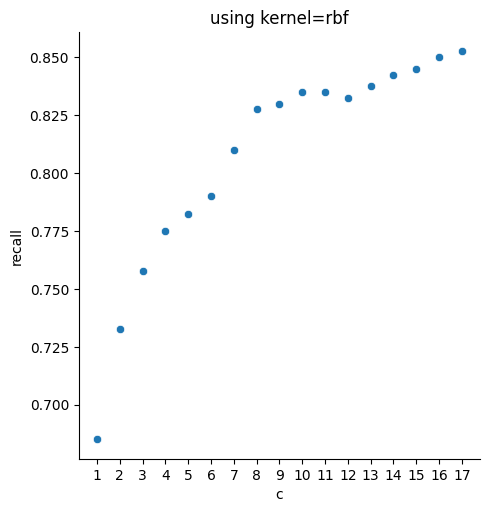

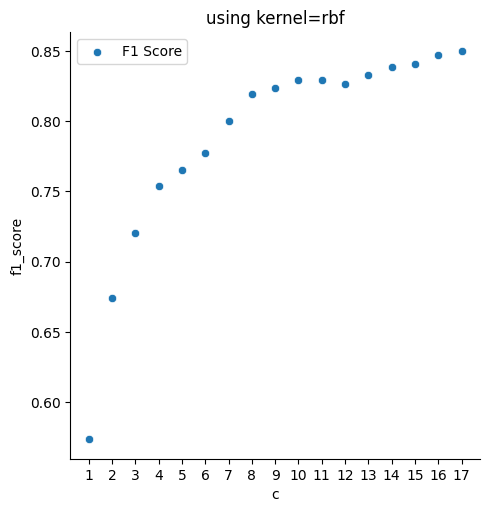

In [143]:


# Create a DataFrame
scores_df = pd.DataFrame(scores_dict_rbf)

# Add 'c' as an x-variable
scores_df['c'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Plot using sns.relplot to consider 'c' as x-variable
sns.relplot(x='c', y='accuracy', data=scores_df, kind='scatter', label='Accuracy')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=rbf')
sns.relplot(x='c', y='precision', data=scores_df, kind='scatter', label='Precision')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=rbf')
sns.relplot(x='c', y='recall', data=scores_df, kind='scatter', label='Recall')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=rbf')
sns.relplot(x='c', y='f1_score', data=scores_df, kind='scatter', label='F1 Score')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=rbf')
# Set the x-ticks to show all 17 points
plt.title('using kernel=rbf')
plt.legend()
plt.show()


# Compare SVM performance with various kernels (e.g.,  polynomial  function).
Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

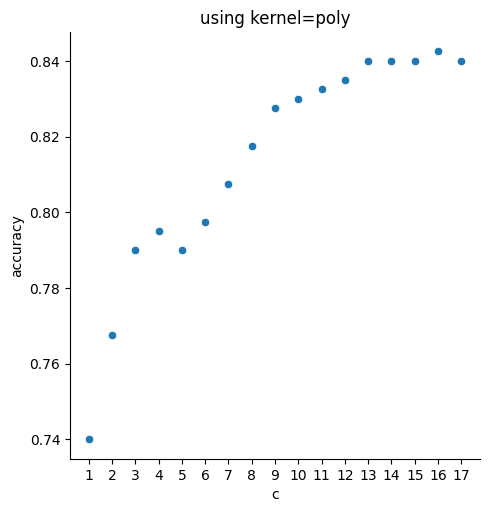

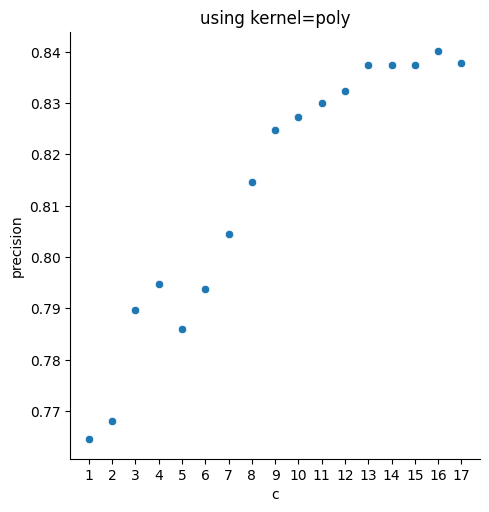

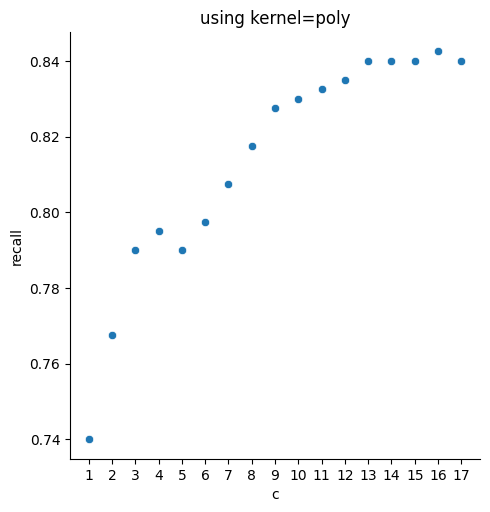

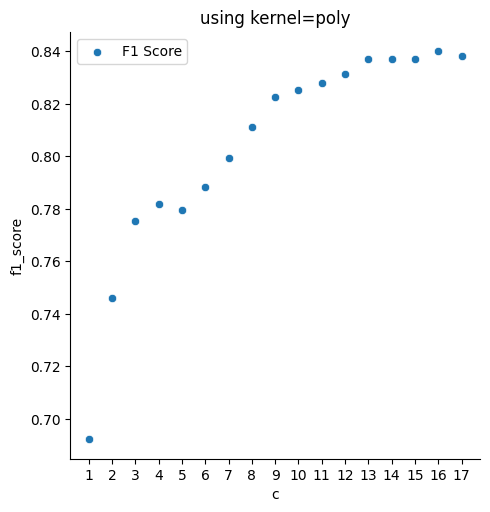

In [144]:


# Create a DataFrame
scores_df = pd.DataFrame(scores_dict_poly)

# Add 'c' as an x-variable
scores_df['c'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Plot using sns.relplot to consider 'c' as x-variable
sns.relplot(x='c', y='accuracy', data=scores_df, kind='scatter', label='Accuracy')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=poly')
sns.relplot(x='c', y='precision', data=scores_df, kind='scatter', label='Precision')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=poly')
sns.relplot(x='c', y='recall', data=scores_df, kind='scatter', label='Recall')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=poly')
sns.relplot(x='c', y='f1_score', data=scores_df, kind='scatter', label='F1 Score')
plt.xticks(ticks=scores_df['c'])
plt.title('using kernel=poly')
# Set the x-ticks to show all 17 points
plt.title('using kernel=poly')
plt.legend()
plt.show()


# 3.	Discuss practical implications of SVM in real-world classification tasks.


SVMs are commonly used in natural language processing (NLP) for tasks such as sentiment analysis,
spam detection, and topic modeling.SVMs are applied in image classification tasks such as object detection and image retrieval
Image Recognition: Facebook's facial recognition feature uses SVM to identify faces in uploaded photos. Google Photos also uses
SVM to categorize and search images. Speech Recognition: Apple's Siri and Google Assistant use SVM to recognize voice
commands.